1) **GOAL**

my objective is to Predict which customers are likely to accept a personal loan offer using classification techniques.

2) **INTRO TO PROBLEM**

This task aims to predict which customers are likely to accept a personal loan offer using the Bank Marketing Dataset. By analyzing features like age, job, and marital status, we can build a classification model to help banks target the right customers and improve the efficiency of their marketing campaigns.

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# OBJECTIVE AND INTRO TO PROBLEM STATEMENT

# Import Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank.csv


In [ ]:
#importing the dataset
df = pd.read_csv('bank.csv')
df.head() #first few rows of our csv

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# **Data Exploration**

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None


In [ ]:
#find percentage of missing values for each column
missing_values = df.isnull().mean()*100
missing_values.sum()

np.float64(0.0)

In [ ]:
# Check value counts for key categorical feature
print("\nJob types:\n", df['job'].value_counts())
print("\nMarital status:\n", df['marital'].value_counts())


Job types:
 job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

Marital status:
 marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# **DATA VISULIZATION**

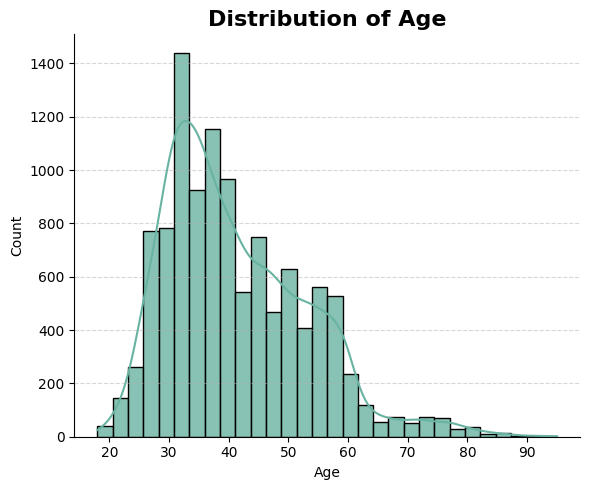

In [ ]:
#Age Distribution
plt.figure(figsize=(6,5))
sns.histplot(data=df, x='age', kde=True, bins=30, color='#69b3a2', edgecolor='black', alpha=0.8)
plt.title("Distribution of Age", fontsize=16, weight='bold')
plt.xlabel("Age")
plt.ylabel("Count")
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

This graph shows how customer ages are distributed across the dataset, with a smooth KDE curve overlay. Most customers fall between ages 25 and 50, indicating the bank targets working-age individuals.



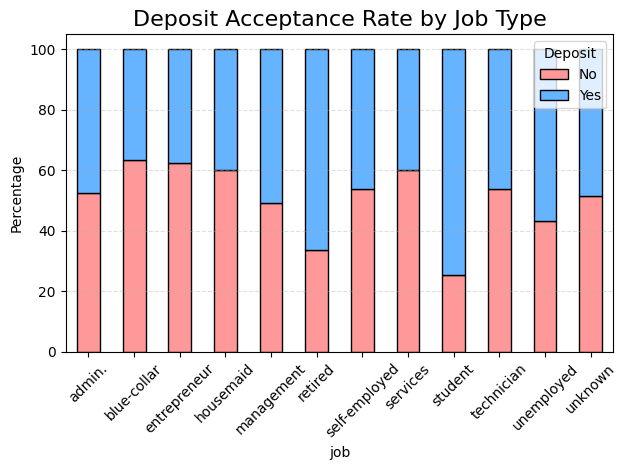

In [ ]:
#Loan Acceptance by Job
job_loan_data = pd.crosstab(df['job'], df['deposit'], normalize='index') * 100
job_loan_data.plot(kind='bar', stacked=True, color=['#FF9999','#66B3FF'], edgecolor='black')
plt.title("Deposit Acceptance Rate by Job Type", fontsize=16)
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.legend(["No", "Yes"], title="Deposit")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

This plot displays the percentage of customers in each job category who accepted or declined the loan. Jobs like 'admin.' and 'entrepreneur' have lower acceptance rates, while 'student' and 'retired' show higher interest.

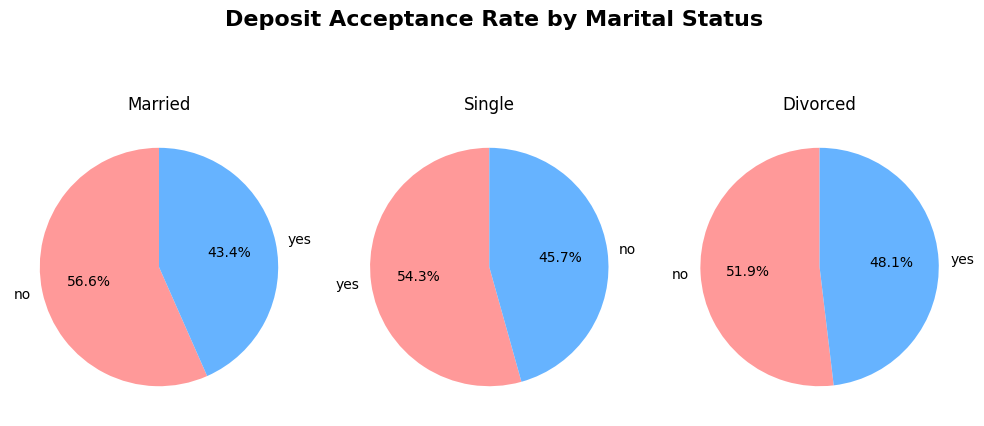

In [ ]:
# Create subplot pies for each marital status
marital_types = df['marital'].unique()
fig, axes = plt.subplots(1, len(marital_types), figsize=(10,5))

colors = ['#FF9999', '#66B3FF']

for i, marital in enumerate(marital_types):
    group = df[df['marital'] == marital]
    counts = group['deposit'].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    axes[i].set_title(f'{marital.title()}')

fig.suptitle("Deposit Acceptance Rate by Marital Status", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


The pie subplots break down each marital group's deposit decisions, showing the share of 'yes' vs 'no' within that specific group. This makes it easy to compare how likely customers in each category are to accept a deposit offer.

# **HANDLING THE MISSING VALUES**

In [ ]:
# Check how many NaN values exist in each column
print(" Missing values per column:\n")
print(df.isnull().sum())

# Drop rows with any missing (NaN) values
df = df.dropna()

# Confirm that all missing values are removed
print("\n Data shape after dropping NaNs:", df.shape)
print(" Missing values remaining:\n", df.isnull().sum().sum())


 Missing values per column:

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

 Data shape after dropping NaNs: (11162, 17)
 Missing values remaining:
 0


# **ENCODING THE FEATURES**

In [ ]:
# Binary encoding
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})
df['default'] = df['default'].map({'yes': 1, 'no': 0})
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})

# One-hot encoding for remaining categorical variables
df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], drop_first=True)


# **Data Modeling**

In [ ]:
X = df_encoded.drop('deposit', axis=1)
y = df_encoded['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# **Logistic Regression Model**

In [ ]:
#training the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

# **EVALUATING THE MODEL**

In [ ]:
y_pred = model.predict(X_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81      1166
           1       0.80      0.78      0.79      1067

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233



# **CONFUSION MATRIX**

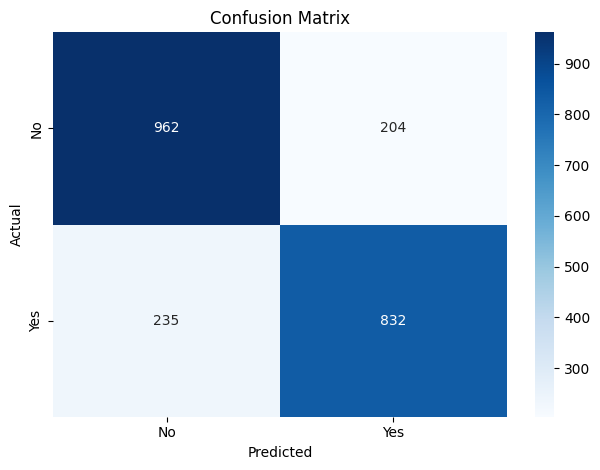

In [ ]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# **CONCLUSION**

Our model did a pretty good job! It was able to correctly predict whether a customer would accept a personal loan about 80% of the time. It handled both types of customers those who said yes and those who said no almost equally well, showing a good balance between being accurate and fair. This means the bank can confidently use this model to target the right people for future loan offers and avoid wasting time on those unlikely to respond.